#Milestone1

Stephanie Eordanidis.
Ravjot Sachdev,
Jackson Taber

Syracuse University : College of Engineering & Computer Science

223 Link Hall, Syracuse, NY 13244

*sleordan@syr.edu, rssachde@syr.edu, jrtaber@syr.edu*

CIS 700 Machine Learning and Security

04/21/2021


##Theme:
 “Adversarial Text Generation: Adversarial Machine Learning Applications in Text Analysis”

##Purpose:
The purpose of this lab is to successfully run a new text dataset to generate synthetic data using an existing GAN project framework.

##Project:
Texygen is the name of the project selected. This project is a benchmarking tool that aids in text generation model research and testing. This tool allows for ease of various model testing to compare accuracy and synthetic data generation of models using same training baseline.

##(Hard/Soft)ware:
**Google Colaboratory**		https://colab.research.google.com/

**GPU**                     Python 3 Google Compute Engine backend

**Github**                  https://github.com/eordanis/CIS-700/tree/main/Project/Milestone1/Milestone1_test

##Resources:
**Original Source:** 		https://github.com/geek-ai/Texygen

**Modified Sources Acquired:** 	2SU Course Files Section -> Texygenmaster_Python_3.6.zip

##Data:
The data for the selected project is setup as follows:

•	Generated data training: 5000 word and 20 sentence count

•	Oracle data generation: 10,000 sentence generation

•	Real data training:
        * image_coco : 20,000 sentences chosen from the image COCO captions data. 10,000 of which are used as training set while other 10,000 used as test set
        * eapoe : 266 sentences chosen from the seinfeld script data. 133 of which are used as training set while other 133 used as test set
                     Compiled from various Edgar Allan Po Poems found on referenced poem sight  [4].

##Modifications:
To begin, the modified source code acquired from the 2SU application was further modified to combine the original intention of the origin source authors as well as professor modification. If no arguments are passed, all models/data are run. Note, the order or model generation is done by first iterating over the GAN model type, then data type. If arguments are passed, those arguments will be validated and run accordingly to run a more targeted model test. Addition modifications were applied to eliminate much library warnings and informational messages as to keep output as clean as possible. Furthermore, file path naming was updated to be compliant with Google Colaboratory environment. All epoch time elapse console printing has been commented out for cleaner output reading.

##Setup:
Due to the heft of processor/gpu usage, it was deemed necessary to run the project in the Google Colaboratory. Original attempt to run was done via Pycharm IDE Professional Edition with Anaconda derived environments, however this proved too great of a strain on the accessible workstation.

###Step 1
A new Google Colaboratory workspace was setup, titled “Milestone1”. This workspace was run using the hosted runtime environment. This document is the current document being read.

In order to run against provided code base, it was necessary to sync the colab workspace the github repository files as follows

```
!git clone https://$GITHUB_AUTH@github.com/eordanis/CIS-700/
```

Running this command from the first cell in the workbook syncs the drive to the github repo location of project location

In [ ]:
!git clone https://$GITHUB_AUTH@github.com/eordanis/CIS-700/

###Step 2
Now the directory was changed to the folder needed to run the project

```
        %cd CIS-700/Project/Milestone1/Milestone1_test
```

In [ ]:
%cd CIS-700/Project/Milestone1/Milestone1_test

###Step 3
Now it was necessary to import and download any missing libraries the hosted colaborartoy runtime did not have readily available via the following commands:
```
            !pip install -r "requirements.txt"
            import nltk
            nltk.download('punkt')
```
Running this command from the next cell in the workbook installed the necessary libraries and at specified versions for the project.


In [ ]:
!pip install -r "requirements.txt"
import nltk
nltk.download('punkt')

###Step 4
Now it is time to run the application. Below are two examples of commands to run the application.
```
!python3 "main.py"
```
This first command was run without parameters. In the case of this command, all trainings (SeqGAN, Gsgan, TextganMmd, Leakgan, Rankgan, Maligan, Mle) were run on all available defaulted training data (oracle LSTM, real data, CFG). Running this command can take around 2+ hours to complete.

```
!python3 "main.py" -g seqgan -t real
```

This second command was run with parameters. In the case of this command, main was run with SeqGAN training on image_coco. Running targeted trainings take less time to run, on average completing in 5-15 minutes depending on selected parameters. With the above selection, runtime was run above 10 minutes.

```
!python3 "main.py" -g seqgan -t real  -d data/eapoe.txt
```

This third command was run with parameters. In the case of this command, main was run with SeqGAN training on eapoe. Running targeted trainings take less time to run, on average completing in 5-15 minutes depending on selected parameters. With the above selection, runtime was run above 10 minutes.

**NOTE:** For above estimates, based around 5 epochs. Additionally, CFG training appears to have stopped working suddently, unsure why broken. Therefore running without that option for the time being. Additionally, the LeakGan model failed entirely to run now due to flag errors, so this model was discarded from testing.


##Process

When running the various models, there are similar steps for each.
1.	Beginning Training – begin model training(s)
2.	Set training - sets the desired model training method
3.	Start model pre-train generator – uses the training data to pre-train the generator model
4.	Start model pre-train discriminator - – uses the training data to pre-train the discriminator model
5.	Model adversarial training – runs the model to generate results based on the test data and metrics applied
6.	Finish Training – end of model training(s)

During training, each model training runs through several passes or epochs. For simplicity, base epoch is set to 5, with model training running thrice for 15 total epochs there abouts for each model trained on a particular data set.


##Metrics

**Abbreviations:**
*   BLEU 	- BiLingual Evaluation Understudy
*   GAN 	- Generative Adversarial Network
*   NLL 	- Negative Log-Likelihood
*   RL	- Reinforcement Learning

**Definitions**
*   EmbSim – influenced by BLEU, used instead to compare the word embeddings vs BLEU’s comparison of word similarity between two sentences or documents.
*   NLL-oracle : applied to synthetic data to determine fitting via oracle language model standards.
*   NLL-test : dual to NLL-Oracle, used to determine a model’s capability to fit to real test data

These measurement standards and more are discussed In the project directory’s “/docs/evaluation.md” location.


##Models
For this report, the TextGAN and SeqGAN models were run on oracle and real training types. The real training types essentially runs the data against the image_coco.txt caption data. The TextGAN and SeqGAN was developed by the source project team to improve on existing GAN networks.

With regards to TextGan, the goal of this model is to generate high quality realistic synthetic data while overcoming the convergence dilemma by using a generator that runs as a long short-term memory network and its discriminator a convolutional network. By matching high-dimension laten feature distributions of the testing and training data, this model over longer epochs has shown demonstrate a higher performance in quantitative evaluation, showing the TextGAN model can produce sentences that appear to have been written by a human, and not AI generated.

For the SeqGAN model, this also proved successful in generating realistic looking sentences via this generator process. A second model was selected for comparison purposes. SeqGAN’s generator is based off the reinforcement learning stochastic policy, allowing SeqGAN to performing gradient policy update in order to circumvent differentiation issues in the generation. Its discriminator is run on complete sentences, and its results used as the reinforcement learning reward signal. According to source authors, this model boasted higher performance over others run.


##Testing

Epochs were increased left to run at 5 for the sake of time. However, it is noted that as according to original project sourcing, >= 45 epochs for the models display the best NLL loss results on epochs > 40, prior to that point results would be poorer. NLL loss values are indicated to be better the lower they are, so if these values trend downward, the models are improving. For EmbeddedSimilarity, higher values are desired for better results.

###TextGAN
The following commands are to run TextGAN model on both oracle and real trainings.

**NOTE:** The real data essentially trained the model on the eapoe.txt data.
```
!python3 "main.py" -g textgan -t oracle
!python3 "main.py" -g textgan -t real
```

In [ ]:
!python3 "main.py" -g textgan -t oracle

******** Beginning Training ********
set training
oracle
start pre-train generator:
nll-oracle
time elapsed of nll-oracle: 1.0739710330963135
nll-test
time elapsed of nll-test: 1.2133264541625977
EmbeddingSimilarity
time elapsed of EmbeddingSimilarity: 88.22535681724548
epoch:1	nll-oracle:12.198931	nll-test:40.538124	EmbeddingSimilarity:-0.19819031171098683	
start pre-train discriminator:
adversarial training:
nll-oracle
time elapsed of nll-oracle: 1.081681489944458
nll-test
time elapsed of nll-test: 1.2737576961517334
EmbeddingSimilarity
time elapsed of EmbeddingSimilarity: 43.726564168930054
epoch:6	nll-oracle:11.897842	nll-test:36.785576	EmbeddingSimilarity:-0.309232358180863	
nll-oracle
time elapsed of nll-oracle: 1.0407702922821045
nll-test
time elapsed of nll-test: 1.1645281314849854
EmbeddingSimilarity
time elapsed of EmbeddingSimilarity: 43.738325357437134
epoch:10	nll-oracle:11.898141	nll-test:36.8766	EmbeddingSimilarity:-0.3125717377492794	
******** Completed Training *******

####Oracle Output
As we can see from the output above, over several loopthroughs, or epochs, the accuracy of the nll oracle and test values varied but appeared to having an upward trend in accuracy over epoch runs when running TextGAN with oracle training. However, it is noted the embedded fell over time during the runs.
For training, it would yeild better results to run higher epochs, such as 40, however for testing sake only 5 were run.

**Best Values**

*   NLL-oracle:             11.898141             @epoch 10
*   NLL-test:               36.785576             @epoch 6
*   EmbeddingSimilarity:    -0.198190311710986    @epoch 1

In [ ]:
!python3 "main.py" -g textgan -t real -d data/eapoe.txt

******** Beginning Training ********
set training
real
start pre-train generator:
EmbeddingSimilarity
time elapsed of EmbeddingSimilarity: 44.0513916015625
nll-test
time elapsed of nll-test: 0.07195925712585449
epoch:1	EmbeddingSimilarity:-0.36917074786673465	nll-test:37.6523	
start pre-train discriminator:
adversarial training:
EmbeddingSimilarity
time elapsed of EmbeddingSimilarity: 43.88083100318909
nll-test
time elapsed of nll-test: 0.013695955276489258
epoch:6	EmbeddingSimilarity:-0.3965602633631248	nll-test:37.735287	
EmbeddingSimilarity
time elapsed of EmbeddingSimilarity: 43.74346661567688
nll-test
time elapsed of nll-test: 0.013765573501586914
epoch:10	EmbeddingSimilarity:-0.4435325866887675	nll-test:37.640396	
******** Completed Training ********



####Real Output
As we can see from the output above, over several loopthroughs, or epochs, the accuracy of the nll values are also increase when running TextGAN with real training. However, it is noted the embedded similarity fell over the course of the run. This indicates to us that the test_text.txt data generated should have closer similarity to the original eapoe.txt data file used to train the models.

For training, it would yeild better results to run higher epochs, such as 40, however for testing sake only 5 were run.

**Best Values**

*   NLL-test:               37.6404             @epoch 10
*   EmbeddingSimilarity:    -0.369170747866734  @epoch 1

###SeqGAN
The following commands are to run SeqGAN model on both oracle and real trainings.

**NOTE:** The real data essentially trained the model on the eapoe.txt data.
```
!python3 "main.py" -g seqgan -t oracle
!python3 "main.py" -g seqgan -t real
```

In [ ]:
!python3 "main.py" -g seqgan -t oracle

******** Beginning Training ********
set training
oracle
start pre-train generator:
nll-oracle
time elapsed of nll-oracle: 1.0661637783050537
nll-test
time elapsed of nll-test: 1.1655919551849365
EmbeddingSimilarity
time elapsed of EmbeddingSimilarity: 88.71221280097961
epoch:1	nll-oracle:10.742874	nll-test:7.5933557	EmbeddingSimilarity:-0.2093585259617846	
start pre-train discriminator:
[1.5676435]
[1.4180927]
[1.3492159]
[1.1821852]
[1.1298636]
[1.1436391]
[1.2105415]
[1.2776413]
[1.2531519]
[1.2658339]
[1.2569084]
[1.2460474]
[1.2508906]
[1.2178365]
[1.1665254]
adversarial training:
nll-oracle
time elapsed of nll-oracle: 1.042651653289795
nll-test
time elapsed of nll-test: 1.1159939765930176
EmbeddingSimilarity
time elapsed of EmbeddingSimilarity: 44.104719400405884
epoch:6	nll-oracle:10.199376	nll-test:7.031317	EmbeddingSimilarity:-0.20886221700123014	
[1.1601384]
[1.1915396]
[1.1655589]
[1.1938679]
[1.2495728]
[1.2036669]
[1.2140615]
[1.2339144]
[1.214484]
[1.1839753]
[1.1693196]


####Oracle Output
As we can see from the output above, over several loopthroughs, or epochs, the accuracy of the nll oracle and test values varied but leaned toward improvment when running SeqGAN with oracle training. Additionally, it is noted the embedded similarity is improving as well.

For training, it would yeild better results to run higher epochs, such as 40, however for testing sake only 5 were run.

**Best Values**

*   NLL-oracle:             10.114458             @epoch 10
*   NLL-test:               7.031317              @epoch 6
*   EmbeddingSimilarity:    -0.207636699321102    @epoch 10

In [ ]:
!python3 "main.py" -g seqgan -t real -d data/eapoe.txt

******** Beginning Training ********
set training
real
start pre-train generator:
EmbeddingSimilarity
time elapsed of EmbeddingSimilarity: 44.03479051589966
nll-test
time elapsed of nll-test: 0.06215381622314453
epoch:1	EmbeddingSimilarity:-1.092657517043026	nll-test:6.101324	
start pre-train discriminator:
[1.2007741]
[1.0471132]
[0.84945107]
[0.8024252]
[0.7262596]
[0.65638715]
[0.6189074]
[0.7355596]
[0.6026283]
[0.5812113]
[0.57940626]
[0.57629865]
[0.5636269]
[0.6362342]
[0.5192875]
adversarial training:
92.44891
EmbeddingSimilarity
time elapsed of EmbeddingSimilarity: 44.07878828048706
nll-test
time elapsed of nll-test: 0.012879133224487305
epoch:6	EmbeddingSimilarity:-0.726695526133442	nll-test:3.8079882	
[0.58081025]
[0.5694416]
[0.51506567]
[0.5661042]
[0.51280504]
[0.5122116]
[0.66419333]
[0.58712816]
[0.5099495]
[0.5725429]
[0.5087162]
[0.50835705]
[0.6621042]
[0.50807506]
[0.58020824]
[0.57996696]
[0.50685817]
[0.5059252]
[0.5775207]
[0.56907755]
[0.66619635]
[0.59326375]
[

####Real Output
As we can see from the output above, over several loopthroughs, or epochs, the accuracy of the nll values are also increase when running SeqGAN with real training. Additionally, it is noted the embedded similarity is improving as well. This indicates to us that the test_text.txt data generated should have closer similarity to the original eapoe.txt data file used to train the models.

For training, it would yeild better results to run higher epochs, such as 40, however for testing sake only 5 were run.


**Best Values**

*   NLL-test:               3.4653516	           @epoch 10
*   EmbeddingSimilarity:    0.510576256396731  @epoch 10

###Data Comparision
####Oracle Data
Model comparison wise, SeqGAN performed better than TextGAN using a base of 5 epochs and under the testing done at this time. It would seem that using the SeqGAN model is superior to the TextGAN model using these qualifying metrics. To see the best results under the SeqGAN model, it would require longer epoch testing.

**TextGAN Best Values**

*   NLL-oracle:             11.898141             @epoch 10
*   NLL-test:               36.785576             @epoch 6
*   EmbeddingSimilarity:    -0.198190311710986    @epoch 1

**SeqGAN Best Values**

*   NLL-oracle:             10.114458             @epoch 10
*   NLL-test:               7.031317              @epoch 6
*   EmbeddingSimilarity:    -0.207636699321102    @epoch 10

####Real Data
When comparing real data metrics between the two models, the results show SeqGAN to generate better values. Again, both models are running metrics on the real data with a base of 5 epoch, however incrementing this value and rerunning may generate different results.

**TextGAN Best Values**

*   NLL-test:               37.6404             @epoch 10
*   EmbeddingSimilarity:    -0.369170747866734  @epoch 1

**SeqGAN Best Values**

*   NLL-test:               3.4653516	           @epoch 10
*   EmbeddingSimilarity:    0.510576256396731  @epoch 10

Here we will take a look at the first 15 lines of the real data files, both training/test [eapoe.txt / test_eapoe.txt] and synthetic data generation from the model labeled test_file.txt

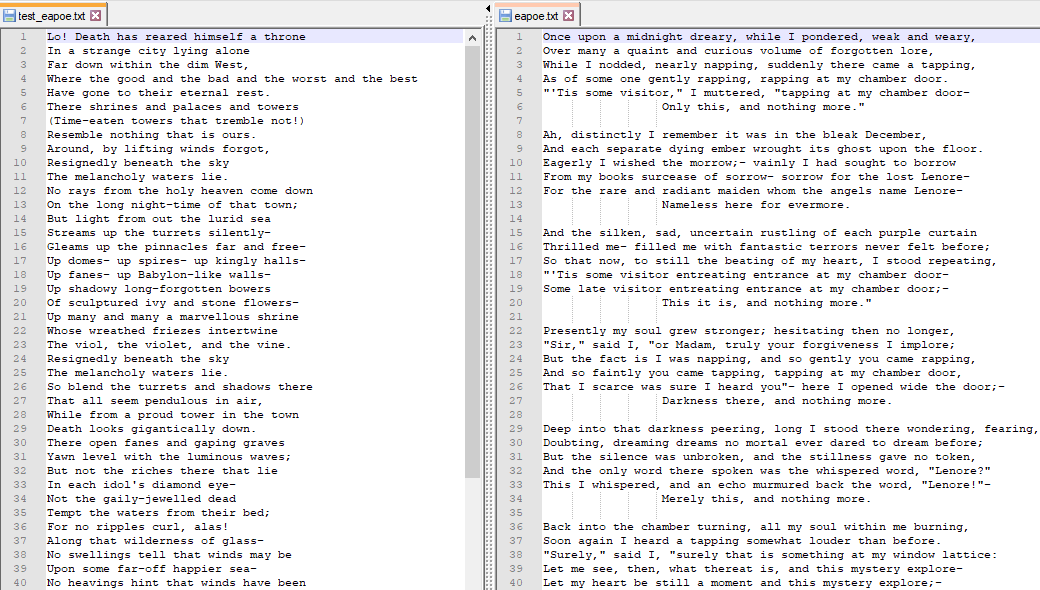


This figure is representative of a side by side comparision between the TextGAN test_file.txt  and SeqGAN test_file.txt files. Although the sentence structures appear lacking, the sentence formulation was well developed. if you compare the full synthetic sentences, SeqGAN appears to have more realistic sentence generation:
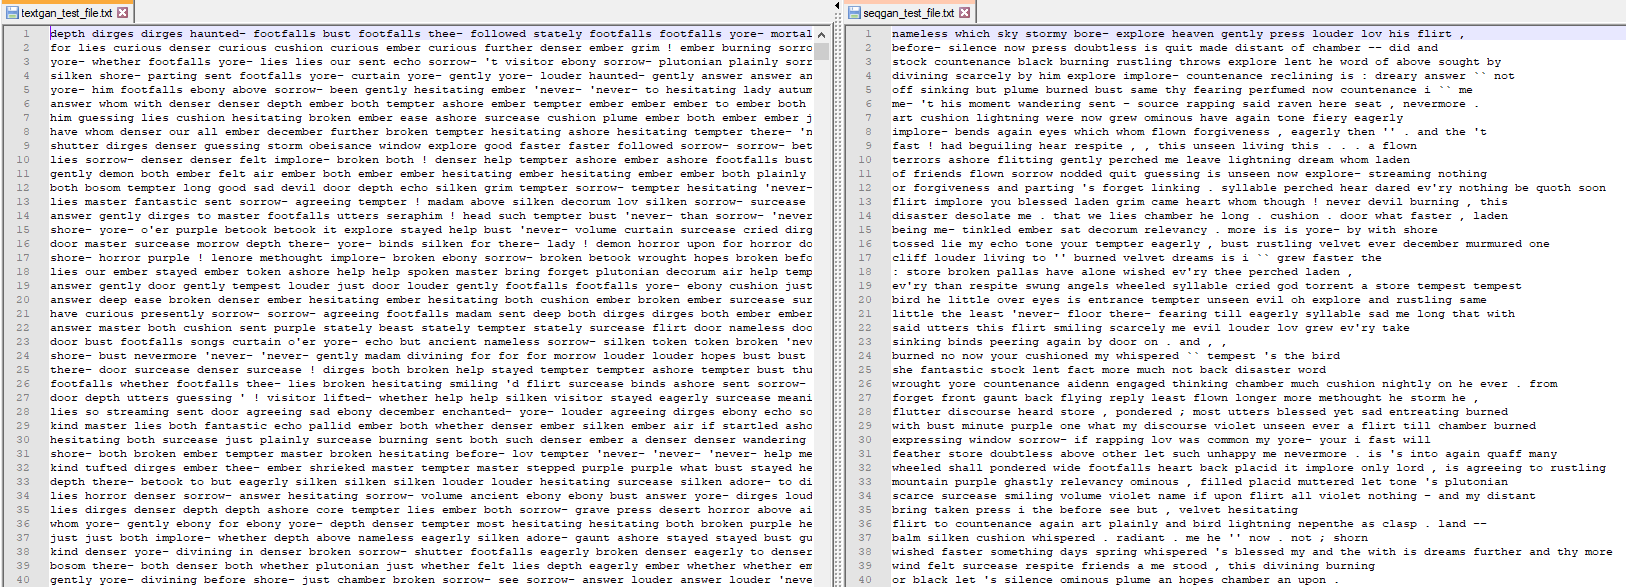




##Notes
This project was a collaborative effort by all team members listed in top of document. Project was developed/run/tested while on video call as a team effort. All parties put forth equal effort in testing, data selection and stripping, as well as understanding content.

Given the short duration of setup, running, etc there was not sufficient time to truly understand each of the models under the project. 2 model were selected for study, however even these would require more than a week for all encompasing tasking to really dive in and understand. Additionally it should be noted the amount of time it takes to run these models with higher epoch values. Running the full models over and over can help training, however can take hours to complete. Furthermore, the .csv files were not populating. Given more time dedicate to this project, issues may have been able to be resolved

##Reference
[1] Geek-Ai. “Texygen by Geek.AI.” GitHub, 2017, github.com/geek-ai/Texygen.

[2] Yu, Lantao, et al. “SeqGAN: Sequence Generative Adversarial Nets with Policy Gradient.” ArXiv.org, 25 Aug. 2017, arxiv.org/abs/1609.05473.

[3] Zhang, Yizhe, et al. “Adversarial Feature Matching for Text Generation.” ArXiv.org, 18 Nov. 2017, arxiv.org/abs/1706.03850.

[4] EA Poem Source.  https://poestories.com/read/valentine

In [ ]:
#PDF/HTML conversion of notebook
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc
!jupyter nbconvert --to PDF "Milestone1.ipynb"
!jupyter nbconvert --to HTML "Milestone1.ipynb"